In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [5]:
def fetch_housing_data(url = HOUSING_URL, path = HOUSING_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    tgz_path = os.path.join(path,"housing.tgz")
    urllib.request.urlretrieve(url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path)
    housing_tgz.close()

In [6]:
fetch_housing_data()

In [10]:
import pandas as pd
import numpy as np

def load_housing_data(path=HOUSING_PATH):
    csv_path = os.path.join(path,"housing.csv")
    return pd.read_csv(csv_path)

In [12]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

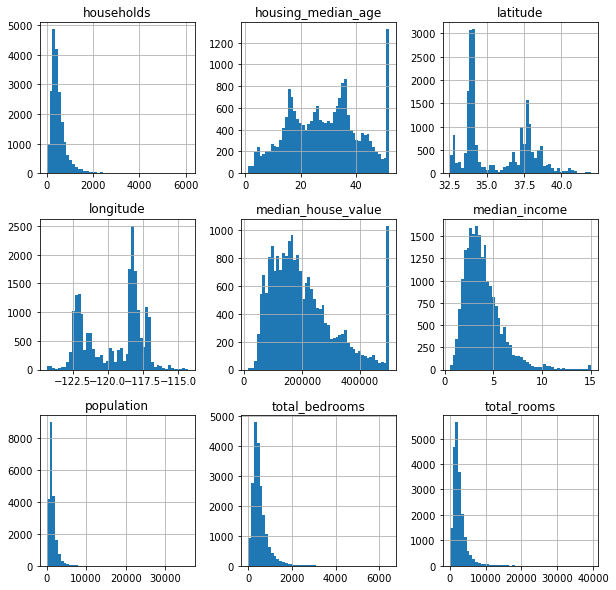

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt

housing.hist(bins=50,figsize = (10,10))
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(housing, test_size = 0.2, random_state = 42)

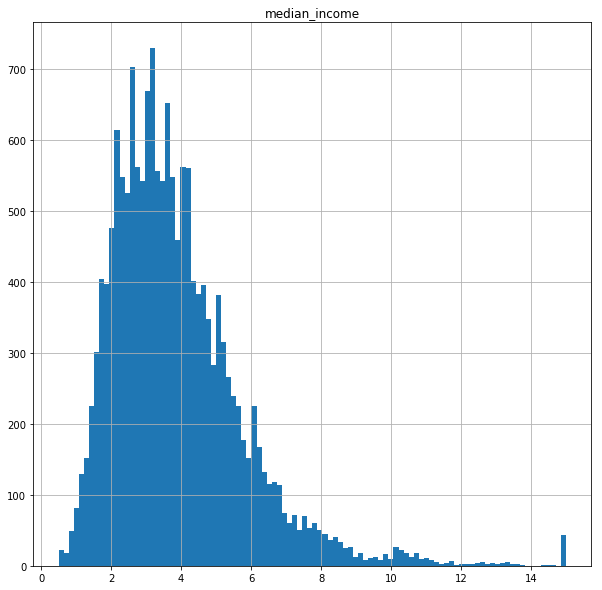

In [32]:
train.hist(column='median_income', bins= 100, figsize=(10,10))
plt.show()

In [47]:
housing['median_cat'] = np.ceil(housing['median_income']/1.5)

In [49]:
housing['median_cat'].where(housing['median_cat']<5,5.0,inplace = True )

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit

In [52]:
split = StratifiedShuffleSplit(n_splits= 1, test_size=0.2, random_state=42)

In [53]:
for train_index, test_index in split.split(housing,housing['median_cat']):
    stat_train = housing.loc[train_index]
    stat_test = housing.loc[test_index]

In [61]:
for set in (stat_train,stat_test):
    set.drop(['median_cat'],axis = 1,inplace = True)